# Linear Regression
Linear regression is a linear-based model that follows the linear equation in (1) to predict values:

$\begin{equation}
    \hat{y} = \omega x + b,
\end{equation}$

where $\omega$ is the weight of the model, $x$ represents the independent data, and $b$ shows the bias. The mean squared error (MSE) or mean absolute error (MAE) are used to evaluate the predictions. For example, relying on MSE, we have

$\begin{equation}
    \mathcal{L} = \frac{\sum_{i = 1}^{N}(\hat{y}_{i} - y_{i})^{2}}{N}
\end{equation}$

## How to Implement LogisticRegression for Binary Classification
We use stochastic gradient descent (SGD) to train the model. Hence, assuming a learning rate of $\alpha$ and the maximum number of iterations $n\_iters$, we

1. initialize the weigths as zero
2. initialize the bias as zero
3. calculate $\frac{\partial z}{\partial\omega}$
4. calculate $\frac{\partial z}{\partial b}$
5. update weights as $\omega = \omega - \alpha.\frac{\partial z}{\partial\omega}$
6. update bias as $b = b - \alpha.\frac{\partial z}{\partial b}$
7. repeat steps 3 - 6 for $n\_iters$ times

For the inference part, we use the updated weights and bias in Eq. (1) and calculate the loss using Eq. (2)

It is worth noting that the current document is based on the guidelines provided in https://www.youtube.com/watch?v=YYEJ_GUguHw.

## Define the Manual Model

### Import Required Libraries

In [1]:
import numpy as np
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

### Define Required Functions

In [2]:
def mse_fn(x1, x2):
    return np.mean((x1 - x2)**2)

### LogisticRegression Class

In [3]:
class linearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            predictions = np.dot(X, self.weights) + self.bias

            diff = predictions - y
            dw = (1/n_samples) * 2 * np.dot(X.T, diff)
            db = (1/n_samples) * 2 * np.sum(diff)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            loss = mse_fn(predictions, y)
            self.losses.append(loss)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        return y_pred

## Train and Inference

### Import Required Libraries

In [4]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Define Required Functions

In [5]:
def plot(X, y, title):
    plt.Figure(figsize=(12, 6))
    plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

In [6]:
def plot_loss(losses):
    x_t = [i for i in range(len(losses))]
    plt.Figure(figsize=(12, 6))
    plt.plot(x_t, losses, linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [7]:
def plot_pred(X, y, y_pred, title):
    plt.Figure(figsize=(12, 6))
    plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
    plt.plot(X, y_pred, color='k', linewidth=2, label='Prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

### Import Data

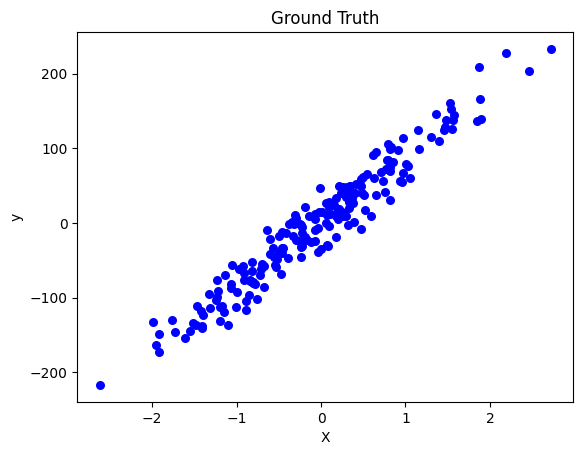

In [8]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# plot data
plot(X, y, "Ground Truth")

### Train-Test Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

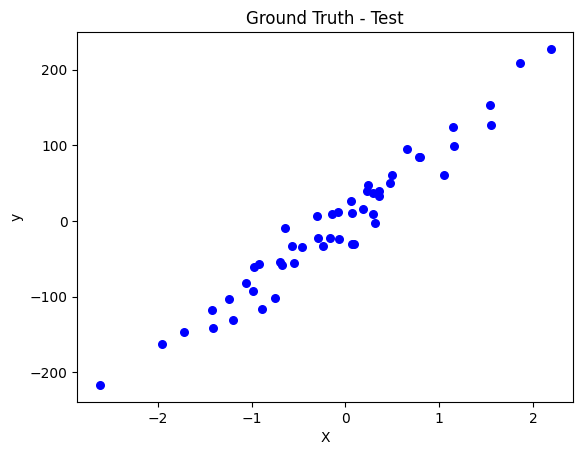

In [10]:
# plot the results
plot(X_test, y_test, "Ground Truth - Test")

### Implement Manual LogisticRegression

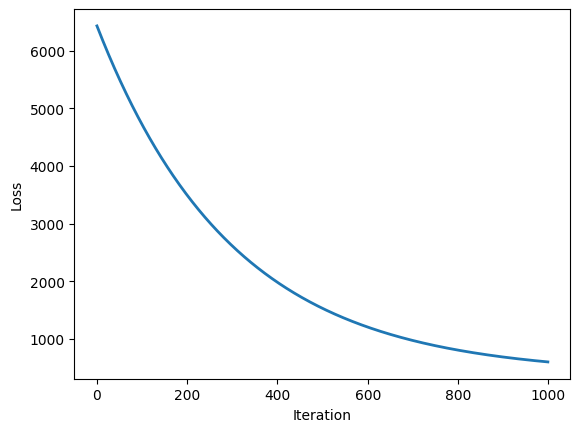

MSE of Predictions with lr = 0.001: 924.1489317279355


In [11]:
# train
clf_linr = linearRegression()
clf_linr.fit(X_train, y_train)
plot_loss(clf_linr.losses)

# inference
y_pred = clf_linr.predict(X_test)

# evaluations
mse = mse_fn(y_pred, y_test)
print(f"MSE of Predictions with lr = {clf_linr.lr}: {mse}")

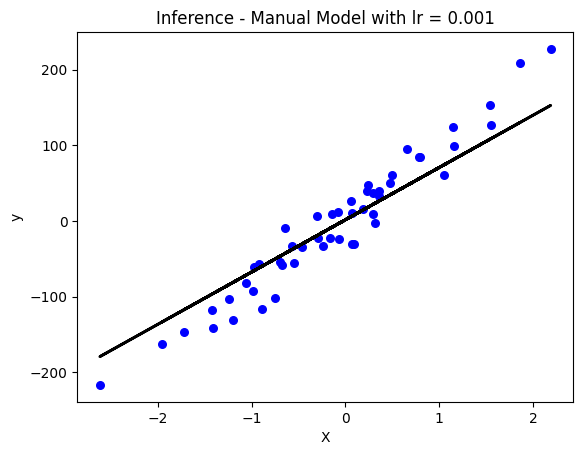

In [12]:
plot_pred(X_test, y_test, y_pred, f"Inference - Manual Model with lr = {clf_linr.lr}")

### Implement Manual LogisticRegression - lr = 0.01

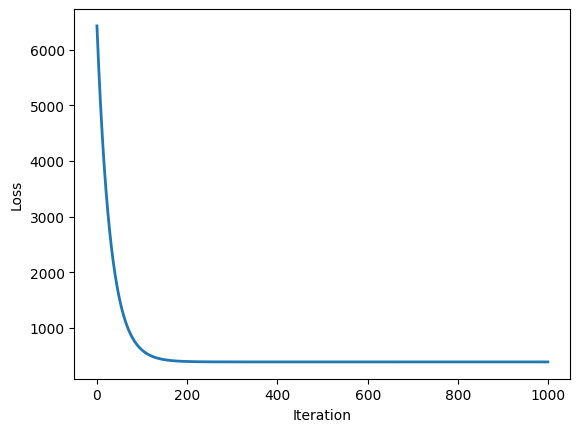

MSE of Predictions with lr = 0.01: 482.1916993290571


In [13]:
# train
clf_linr_001 = linearRegression(lr=0.01)
clf_linr_001.fit(X_train, y_train)
plot_loss(clf_linr_001.losses)

# inference
y_pred_001 = clf_linr_001.predict(X_test)

# evaluations
mse_001 = mse_fn(y_pred_001, y_test)
print(f"MSE of Predictions with lr = {clf_linr_001.lr}: {mse_001}")

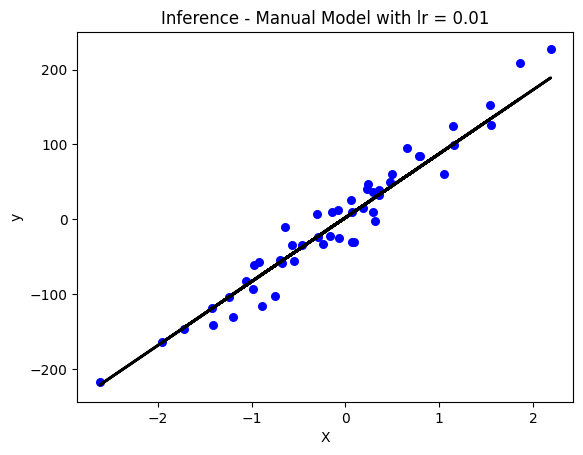

In [14]:
plot_pred(X_test, y_test, y_pred_001, f"Inference - Manual Model with lr = {clf_linr_001.lr}")

### Implement Manual LogisticRegression - lr = 0.1

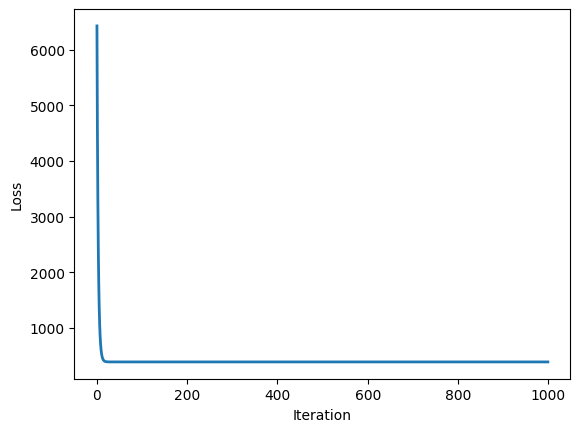

MSE of Predictions with lr = 0.1: 482.19164419417206


In [15]:
# train
clf_linr_01 = linearRegression(lr=0.1)
clf_linr_01.fit(X_train, y_train)
plot_loss(clf_linr_01.losses)

# inference
y_pred_01 = clf_linr_01.predict(X_test)

# evaluations
mse_01 = mse_fn(y_pred_01, y_test)
print(f"MSE of Predictions with lr = {clf_linr_01.lr}: {mse_01}")

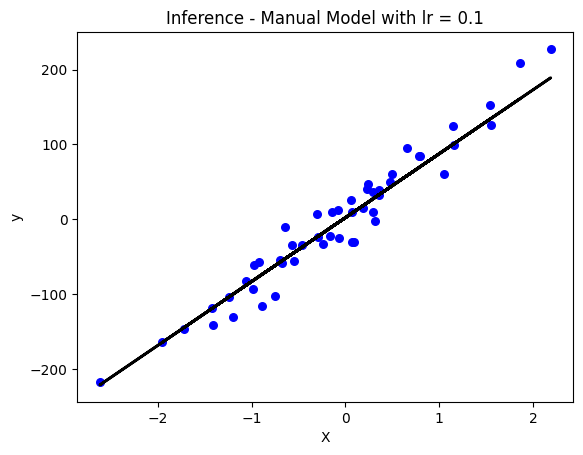

In [16]:
plot_pred(X_test, y_test, y_pred_01, f"Inference - Manual Model with lr = {clf_linr_01.lr}")

## Compare with Sklearn LogisticRegression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# train
clf_linear_sklearn = LinearRegression()
clf_linear_sklearn.fit(X_train, y_train)

# inference
preds = clf_linear_sklearn.predict(X_test)

#evaluations
mse_sklearn = mse_fn(preds, y_test)

print(f"MSE of Sklearn Predictions: {mse_sklearn}")

MSE of Sklearn Predictions: 482.1916441941716


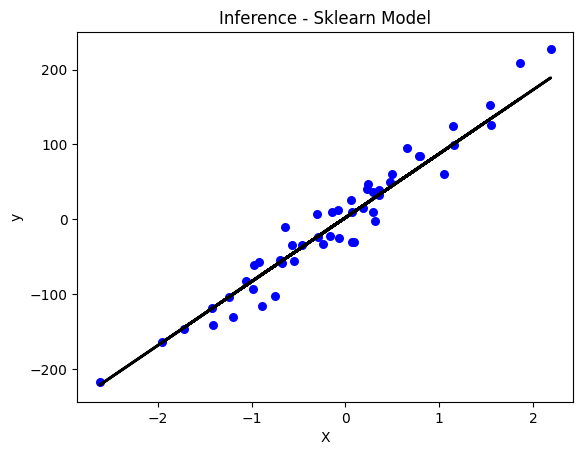

In [19]:
plot_pred(X_test, y_test, preds, "Inference - Sklearn Model")